## Assessing the likelihood of paying back the loan for a peer-to-peer Lending company

## The Data
We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/hadiyad/lendingclub-data-sets

LendingClub is a US peer-to-peer lending company.

### Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when the company gets a new potential customer,can assess whether or not they are likely to pay back the  loan.

The "loan_status" column contains the desired label.



#### Importing necesarry libraries and Loading the info file which has the description for each column in the original dataset and 

In [1]:
#Importing the basic libraries needed for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To store the plot images in the notebook document using inline commands.
%matplotlib inline
data_info = pd.read_csv('../input/lendingclub-data-sets/lending_club_info.csv',index_col='LoanStatNew')

# **Data Overview**
#### There are many LendingClub data sets on Kaggle. Lets have a look at the information on this particular data set:

In [2]:
# aligning the data towards left to get full view of the description column 
data_info.style.set_properties(**{'text-align': 'left'})

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
feat_info('mort_acc')

Number of mortgage accounts.


### **Loading the dataset**

In [5]:
df = pd.read_csv('../input/lendingclub-data-sets/lending_club_loan_two.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis

We have to fetch an overall understanding on all the parameters to find which variables are important by viewing summary statistics and visualizing the data

----

**Let's create a simple countplot in an attempt to predict loan_status.**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

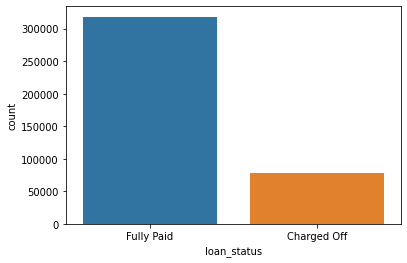

In [7]:
sns.countplot(x = "loan_status", data = df)

**Let's create a histogram plot on loan_amnt column.**

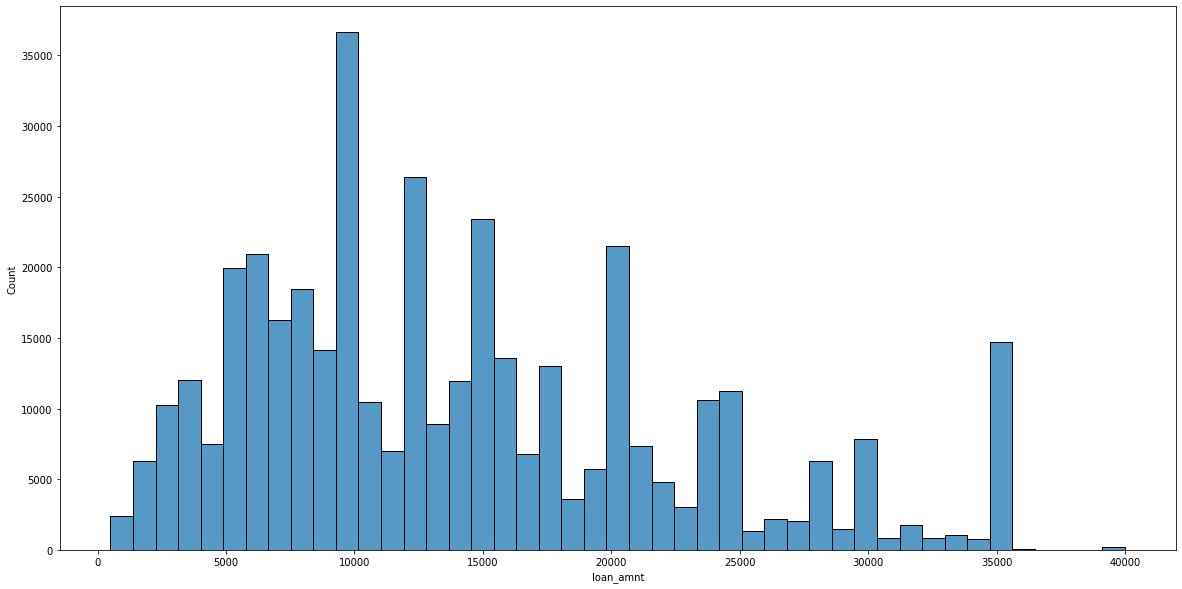

In [8]:
fig,ax = plt.subplots(figsize = (20,10))
g = sns.histplot(ax = ax,x = 'loan_amnt', data = df,bins = 45)

**Let's explore correlation between the continuous feature variables. This can be done by calling the method corr()**

In [9]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Let's visualize this using a heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

<AxesSubplot:>

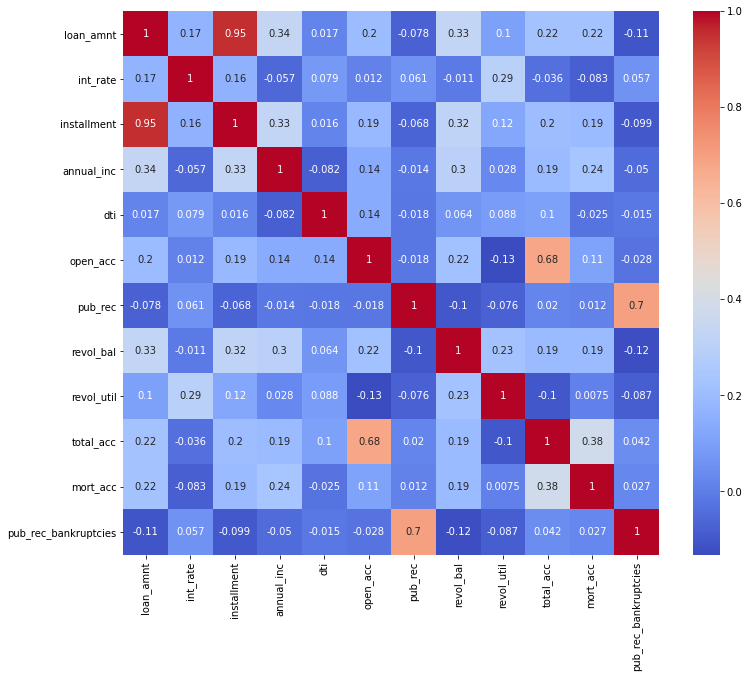

In [10]:
fig,ax = plt.subplots(figsize = (12,10))
sns.heatmap(ax = ax ,data = df.corr(), annot=True,cmap = 'coolwarm')

**We can see almost a perfect correlation with the "installment" feature. Let's explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

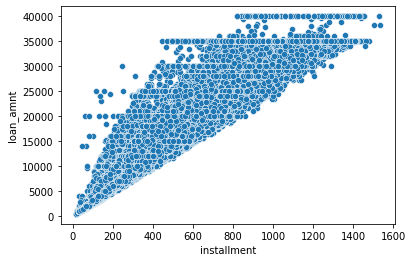

In [11]:
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df)

**Displaying the boxplot showing the relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

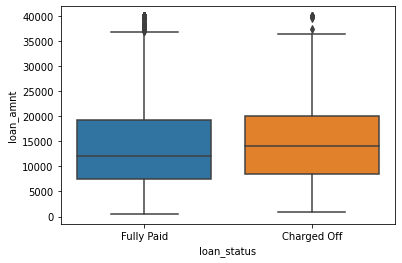

In [12]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

**The summary statistics for the loan amount, grouped by the loan_status.**

In [13]:
df.groupby('loan_status').describe().loan_amnt

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [14]:
print(np.sort(df.grade.unique()))

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [15]:
sub_grade_keys = np.sort(df.sub_grade.unique())
print(sub_grade_keys)

['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']


**Let's Create a countplot per grade. Set the hue to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

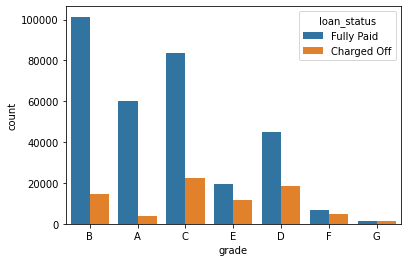

In [16]:
sns.countplot(x = 'grade', data = df, hue = 'loan_status')

**Display a count plot per subgrade. Let's explore both all loans made per subgrade as well being separated based on the loan_status. Let's have a look at a similar plot, but with hue being set to "loan_status"**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

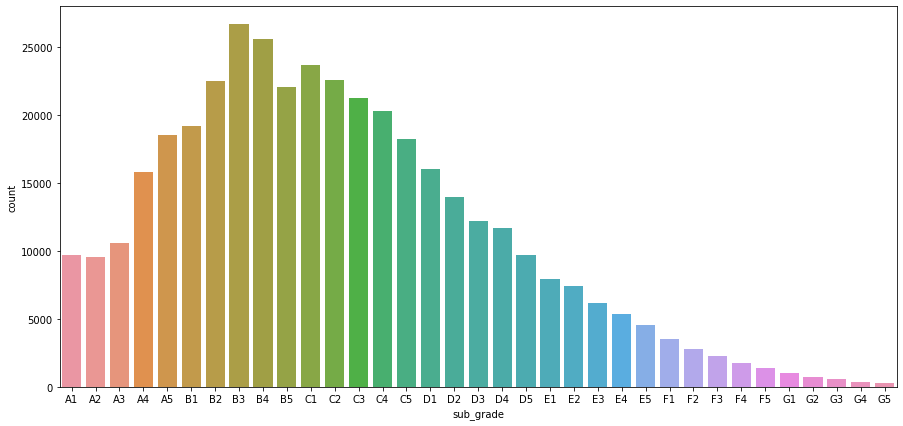

In [17]:
fig, ax = plt.subplots(figsize = (15,7))
sorted_df = df.sort_values(by = ['sub_grade'])
sns.countplot(x = 'sub_grade',data = sorted_df, ax = ax)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

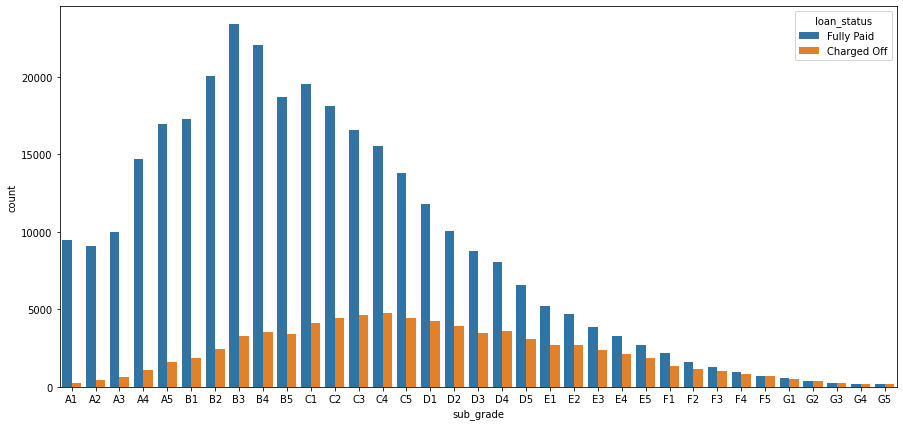

In [18]:
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(x = 'sub_grade',data = sorted_df, ax = ax, hue = 'loan_status')

**It looks like F and G subgrades don't get paid back that often. Isloating those and recreating the countplot just for those subgrades.**

**Grade values before F and G isolotion**

In [19]:
print(df['grade'].value_counts())

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64


**Grade values after F and G isolotion**

In [20]:
sorted_df['grade'] = sorted_df['grade'].apply(lambda x : "F and G" if x in ['F','G'] else x)
df['grade'] = df['grade'].apply(lambda x : "F and G" if x in ['F','G'] else x)
print(sorted_df['grade'].value_counts())

B          116018
C          105987
A           64187
D           63524
E           31488
F and G     14826
Name: grade, dtype: int64


**Countplot of Grade after F and G isolotion**


<AxesSubplot:xlabel='grade', ylabel='count'>

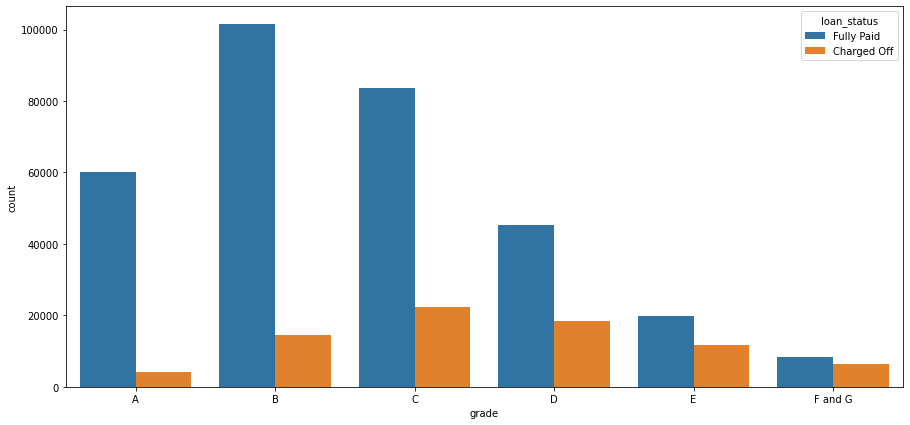

In [21]:
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(x = 'grade',data = sorted_df, ax = ax, hue = 'loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

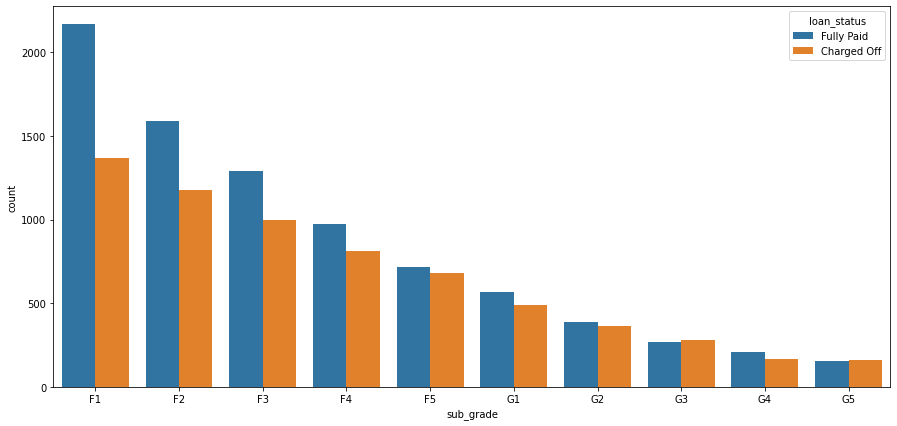

In [22]:
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(data = sorted_df.loc[sorted_df.grade == 'F and G'][['sub_grade','loan_status']],x = 'sub_grade', hue = 'loan_status', ax = ax)

**As loan status is a binary classifier which just says literally conveys whether the loan is fully paid or not,we can create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [23]:
df['loan_repaid'] = df['loan_status'].apply(lambda x : 1 if x == "Fully Paid" else 0)
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Lets create a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

<AxesSubplot:>

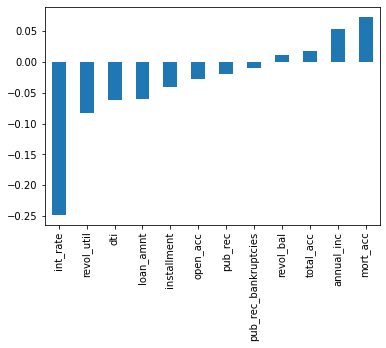

In [24]:
df.corrwith(df.loan_repaid).drop('loan_repaid').sort_values().plot(kind = 'bar')

---
---
# Data PreProcessing

**Goals: Missing data handling. Removing unnecessary or repetitive features. Convert categorical string features to dummy variables.**

Lets have a look at the dataframe using the method head()


In [25]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**Total length of the dataframe?**

In [26]:
len(df.index)

396030

**TASK: Total count of missing values per column.**

In [27]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Lets display in terms of percentage of the total DataFrame**

In [28]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending = False)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_repaid             0.000000
issue_d                 0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
purpose                 0.000000
loan_status             0.000000
address                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
loan_amnt               0.000000
dtype: float64

**Let's examine emp_title and emp_length columns to see whether it will be okay to drop them.**

In [29]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**Looks like there are many employement job titles are present. Finding out the unique employment job titles will help us estimate the importance of that column?**

In [30]:
df.emp_title.nunique()

173105

In [31]:
df.emp_title.value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
Collections Associate                     1
Staff Scientist / HazMat Instructor       1
Associate Compliance Consultant           1
operatinal manager                        1
E k g technician                          1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [32]:
df.drop(columns = ['emp_title'], inplace = True)

* Lets create a count plot of the emp_length feature column.<br>
* Sorting the order of the values will be challenge here<br>
* Hence we use **CategoricalDtype** method from pandas to set the datatype for emp_length column with the specified order

In [33]:
cat_emp_length = pd.CategoricalDtype(
    ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'], 
    ordered=True,
)
df['emp_length'] = df['emp_length'].astype(cat_emp_length)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

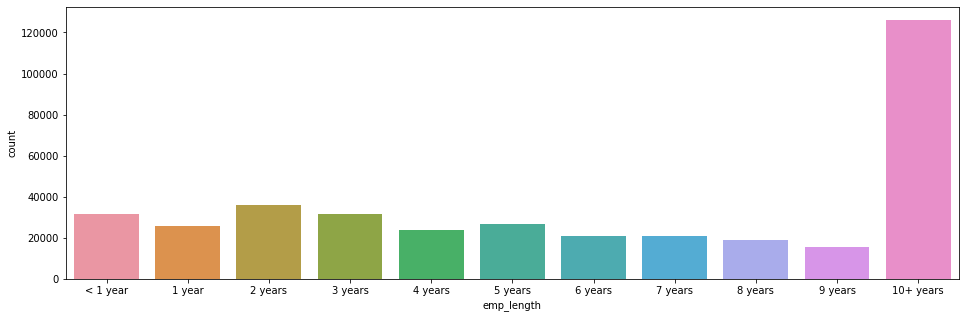

In [34]:
fig,ax = plt.subplots(figsize = (16,5))
sns.countplot(data = df.sort_values(by = 'emp_length'), x = 'emp_length')

**Let's plot out the countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

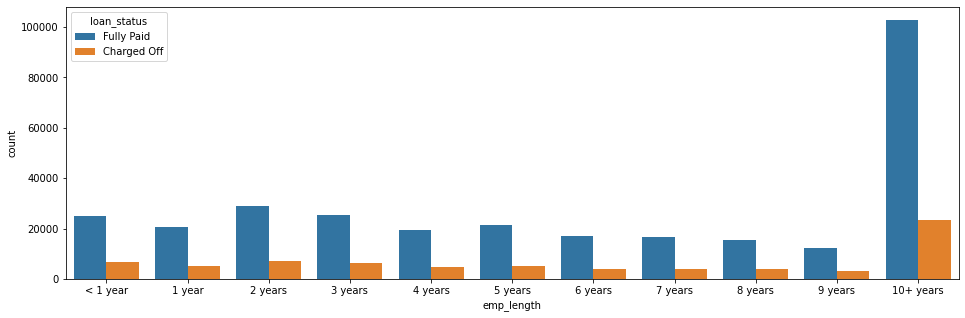

In [35]:
fig,ax = plt.subplots(figsize = (16,5))
sns.countplot(data = df.sort_values(by = 'emp_length'), x = 'emp_length', hue = 'loan_status')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

<AxesSubplot:xlabel='emp_length'>

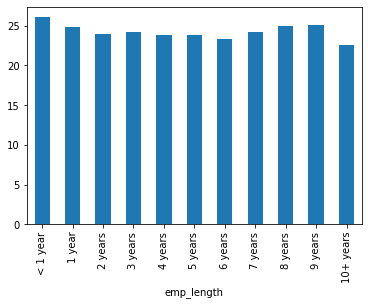

In [36]:
grp_ln_stat = pd.pivot_table(df, index = ['emp_length'],columns = ['loan_status'],values=["loan_amnt"],aggfunc=len).loan_amnt
grp_ln_stat['percent'] = grp_ln_stat['Charged Off']/grp_ln_stat['Fully Paid']*100
grp_ln_stat.percent.plot(kind = 'bar')

**Lets drop the column emp_length, As the Charge off rates are extremely similar across all employment lengths.**

In [37]:
df.drop(columns = ['emp_length'], inplace = True)

**Revisiting the DataFrame to see what feature columns still have missing data.**

In [38]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Review the title column vs the purpose column. Is this repeated information?**

In [39]:
df[['purpose','title']].head()

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance


In [40]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column. Let's go ahead and drop the title column.**

In [41]:
df.drop(columns = ['title'], inplace = True)

**Let's find out what the mort_acc feature represents**

In [42]:
feat_info('mort_acc')

Number of mortgage accounts.


**Displaying the unique values with its counts of the mort_acc column.**

In [43]:
df.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. As there is no 100% correct approach, Let's review the other column to see which most highly correlates to mort_acc**

In [44]:
df.corr().mort_acc.drop('mort_acc').sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc, this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [45]:
total_acc_grp = df.groupby('total_acc').mean().mort_acc
total_acc_grp

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. We are going to use .apply() method on axis=1. Check out the link below for more info.**

[Reference](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [46]:
df.loc[10].isnull().mort_acc

False

In [47]:
df['mort_acc'] = df.apply(lambda x : total_acc_grp[x.total_acc] if x.isnull().mort_acc else x.mort_acc, axis = 1)

In [48]:
#Total null values in mort_acc
df['mort_acc'].isnull().sum()

0

In [49]:
#Percentage of missing values in each columns
df.isnull().sum().sort_values(ascending = False)/len(df)*100

pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_repaid             0.000000
loan_status             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
dti                     0.000000
purpose                 0.000000
address                 0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
loan_amnt               0.000000
dtype: float64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [50]:
print("length of dataframe before and after removing the missing values")
print(len(df))
df.dropna(inplace = True)
print(len(df))

length of dataframe before and after removing the missing values
396030
395219


## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**Let's list down all the columns that are currently non-numeric.

In [51]:
df.select_dtypes(include = ['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [52]:
df.term.value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

---
**Let's now go through all the string features to see what we should do with them.**

---


### Term feature

**Lets Convert the term feature into either a 36 or 60 integer numeric data type**

In [53]:
df['term_36_or_60'] = df.term.apply(lambda x: 0 if int(x[:3]) == 36 else 1)
df['term_36_or_60'].value_counts()

0    301247
1     93972
Name: term_36_or_60, dtype: int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [54]:
df.drop(columns = ['grade','term'], inplace = True)

**Converting the subgrade into dummy variables. Then concatenate these new columns to the original dataframe.**

In [55]:
new_df = df.copy()
new_df = pd.get_dummies(data = new_df,columns = ['sub_grade'], prefix = 'grade',drop_first = True)

In [56]:
new_df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'term_36_or_60',
       'grade_A2', 'grade_A3', 'grade_A4', 'grade_A5', 'grade_B1', 'grade_B2',
       'grade_B3', 'grade_B4', 'grade_B5', 'grade_C1', 'grade_C2', 'grade_C3',
       'grade_C4', 'grade_C5', 'grade_D1', 'grade_D2', 'grade_D3', 'grade_D4',
       'grade_D5', 'grade_E1', 'grade_E2', 'grade_E3', 'grade_E4', 'grade_E5',
       'grade_F1', 'grade_F2', 'grade_F3', 'grade_F4', 'grade_F5', 'grade_G1',
       'grade_G2', 'grade_G3', 'grade_G4', 'grade_G5'],
      dtype='object')

In [57]:
new_df.select_dtypes(include = ['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [58]:
new_df = pd.get_dummies(data = new_df, columns =  ['verification_status', 'application_type','initial_list_status','purpose'] , prefix =  ['ver_status', 'app_type','init_list_status','purpose'],drop_first = True)

In [59]:
new_df.select_dtypes(include = ['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### home_ownership
**LEt's review the value_counts for the home_ownership column.**

In [60]:
new_df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**NONE and ANY classes can be merged with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER.**

In [61]:
new_df['home_ownership'] = new_df.home_ownership.replace(['NONE','ANY'], 'OTHER')

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [62]:
new_df['zip_code'] = new_df.address.apply(lambda x: x[-5:])
new_df.drop(columns = ['address'], inplace = True)

In [63]:
new_df = pd.get_dummies(data = new_df, columns = ['zip_code','home_ownership'], prefix = ['zip', 'home_own'], drop_first = True)

In [64]:
new_df.select_dtypes(include = ['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, Let's drop this feature.**

In [65]:
new_df.drop(columns = ['issue_d'], inplace = True)

### earliest_cr_line
**This appears to be a historical time stamp feature. Let's extract the year from this feature using a .apply function, then convert it to a numeric feature.**

In [66]:
new_df['earliest_cr_year'] = new_df.earliest_cr_line.apply(lambda x: int(x[-4:]))
new_df.drop(columns = ['earliest_cr_line'], inplace = True)

In [67]:
new_df.select_dtypes(include = ['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

**Import train_test_split from sklearn.**

In [68]:
from sklearn.model_selection import train_test_split

**Let's drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [69]:
new_df.drop(columns = ['loan_status'], inplace = True)
len(new_df.columns)

79

**TASK: Set X and y variables to the .values of the features and label.**

In [70]:
X = new_df.drop(columns = ['loan_repaid']).values
y = new_df.loan_repaid.values

----
----

## Grabbing a Sample for Training Time

### Using .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [71]:
s_df = new_df.sample(frac=0.1,random_state=101)
print(len(s_df))

39522


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=101)

## Normalizing the Data

**A MinMaxScaler can be used to normalize the feature data X_train and X_test.**

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

# The Model Creation

**Importing the necessary Keras functions.**

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron.**

In [76]:
# CODE HERE
model = Sequential()

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [77]:
X_train_new.shape

(316175, 78)

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [78]:
model.fit(x = X_train_new, y = y_train, epochs = 25, batch_size = 256, validation_data = (X_test_new, y_test))

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.3580 - val_loss: 0.2640
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2682 - val_loss: 0.2632
Epoch 3/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2630 - val_loss: 0.2619
Epoch 4/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2633 - val_loss: 0.2619
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2619 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2589 - val_loss: 0.2614
Epoch 7/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2585 - val_loss: 0.2615
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2598 - val_loss: 0.2614
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2603 - val_loss: 0.2617
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.258

** Save your model.**

In [79]:
from tensorflow.keras.models import load_model

In [80]:
model.save('lend_club_model.h5')

# Evaluating Model Performance.

**Plot out the validation loss versus the training loss.**

In [81]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

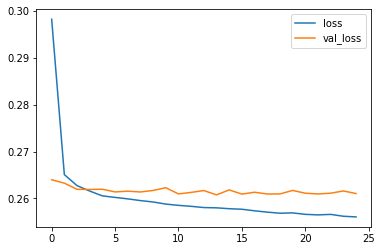

In [82]:
losses.plot()

**Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
y_pred = model.predict_classes(X_test_new)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [86]:
confusion_matrix(y_test, y_pred)

array([[ 6798,  8860],
       [   74, 63312]])

##Quick check
**Given the customer below, would you offer this person a loan?**

In [87]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = new_df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
dti                    30.11
                      ...   
zip_93700               0.00
home_own_OTHER          0.00
home_own_OWN            0.00
home_own_RENT           1.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [88]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [89]:
model.predict_classes(new_customer)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

**Now check, did this person actually end up paying back their loan?**

In [90]:
new_df.iloc[random_ind].loan_repaid

1.0

**We got it right!!**